In [81]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

In [84]:
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'/content/drive/MyDrive/New_York_Housing_Price_Prediction.csv')


In [86]:
#first 5 rows of the dataset
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [87]:
#last 5 rows of the dataset
df.tail()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1.0,750.000000,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [88]:
#dataset shape(rows&columns)
df.shape

(4801, 17)

In [89]:
#info based on the columns
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [90]:
#statistical description of the columns
df.describe()



,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [91]:
#defining correlation between the columns
df.corr()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.000000,0.052189,0.079371,0.110889,-0.020392,-0.054273
BEDS,0.052189,1.000000,0.776447,0.420503,-0.060933,-0.004529
BATH,0.079371,0.776447,1.000000,0.483935,-0.052235,-0.070892
PROPERTYSQFT,0.110889,0.420503,0.483935,1.000000,0.023413,-0.037308
LATITUDE,-0.020392,-0.060933,-0.052235,0.023413,1.000000,0.513969
LONGITUDE,-0.054273,-0.004529,-0.070892,-0.037308,0.513969,1.000000


In [92]:
#defining columns in the dataframe
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [93]:
#Target variable
target_variable = "PRICE" in df.columns
target_variable


True

# Outlier Detection For Price Column

In [94]:
#Interquantile Range
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

In [95]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [96]:
df_no_outliers = df[(df['PRICE'] > lower_bound) & (df['PRICE'] < upper_bound)]
df_no_outliers.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777


In [97]:
#Distribution of Price before Outlieer Removal
fig = px.histogram(df, x='PRICE', nbins=50, title='Distribution of Price')
fig.update_layout(bargap=0.1)

In [98]:
# #Nummber od outliers in the price column after Outlier Removal
# outliers_count_after_removal = df_no_outliers[(df_no_outliers['PRICE'] <= lower_bound) | (df_no_outliers['PRICE'] >= upper_bound)].shape[0]
# outliers_count_after_removal


In [99]:
#Distribution of Price after the Outlier Removal
fig = px.histogram(df_no_outliers, x='PRICE', nbins=50, title='Distribution of Price (After Removing Outliers)')
fig.update_layout(bargap=0.1)

fig.show()

In [100]:
#columns with null values in the dataframe
display("Columns with null values in the dataframe - ",[i for i in df if df[i].isna().sum() != 0])

'Columns with null values in the dataframe - '

[]

In [101]:
df = df.drop_duplicates()
df.shape

(4587, 17)

In [102]:
#Defining the datatypes of the columns
df['BROKERTITLE'] = df['BROKERTITLE'].astype('category')
df['TYPE'] = df['TYPE'].astype('category')
df['BEDS'] = df['BEDS'].astype(int)
df['BATH'] = df['BATH'].astype(int)

df.dtypes


BROKERTITLE                    category
TYPE                           category
PRICE                             int64
BEDS                              int64
BATH                              int64
PROPERTYSQFT                    float64
ADDRESS                          object
STATE                            object
MAIN_ADDRESS                     object
ADMINISTRATIVE_AREA_LEVEL_2      object
LOCALITY                         object
SUBLOCALITY                      object
STREET_NAME                      object
LONG_NAME                        object
FORMATTED_ADDRESS                object
LATITUDE                        float64
LONGITUDE                       float64
dtype: object

In [103]:
#doing One -hot encoder
df_encoded = pd.get_dummies(df, columns=['BROKERTITLE', 'TYPE', 'STATE', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME'], drop_first=True)

df_encoded.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,...,LONG_NAME_Woodrow Road,LONG_NAME_Wooster Street,LONG_NAME_Wright Street,LONG_NAME_Wyckoff Avenue,LONG_NAME_Wyona Street,LONG_NAME_Xenia Street,LONG_NAME_Zerega Avenue,LONG_NAME_Zion Street,LONG_NAME_Zoe Street,LONG_NAME_roosevelt house
0,315000,2,2,1400.0,2 E 55th St Unit 803,"2 E 55th St Unit 803New York, NY 10022",New York County,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,...,0,0,0,0,0,0,0,0,0,0
1,195000000,7,10,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,Central Park Tower Penthouse-217 W 57th New Yo...,United States,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,...,0,0,0,0,0,0,0,0,0,0
2,260000,4,2,2015.0,620 Sinclair Ave,"620 Sinclair AveStaten Island, NY 10312",United States,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,...,0,0,0,0,0,0,0,0,0,0
3,69000,3,1,445.0,2 E 55th St Unit 908W33,"2 E 55th St Unit 908W33Manhattan, NY 10022",United States,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,...,0,0,0,0,0,0,0,0,0,0
4,55000000,7,2,14175.0,5 E 64th St,"5 E 64th StNew York, NY 10065",United States,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,...,0,0,0,0,0,0,0,0,0,0


# Data Visualization(EDA)

mean: 2.354262044909527
median: 2.0


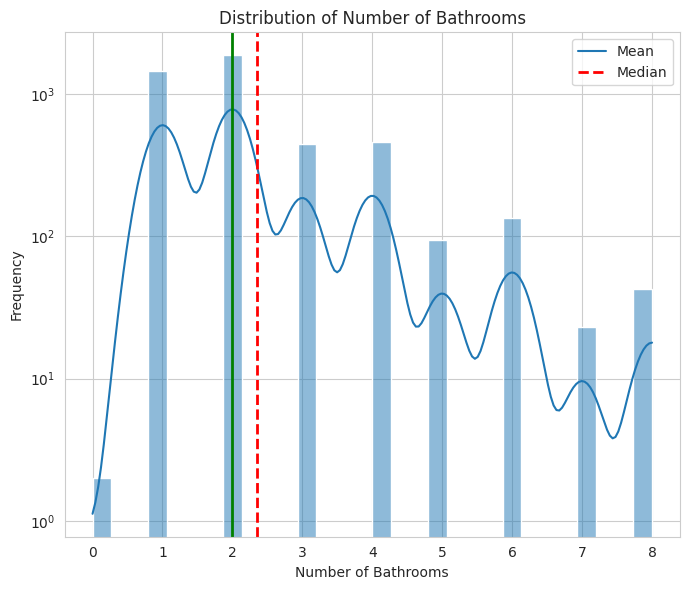

In [104]:
#Distribution of Number of Bathrooms

sns.set_style("whitegrid")

# Define a reasonable maximum value for the 'BATH' column
max_bath = df['BATH'].quantile(0.99)

# Create the histogram plot for 'BATH'
plt.figure(figsize=(7, 6))
sns.histplot(df[df['BATH'] <= max_bath]['BATH'], bins=30, kde=True)

# Draw vertical lines for mean and median
plt.axvline(df['BATH'].mean(), color='r', linestyle='--', linewidth=2)
plt.axvline(df['BATH'].median(), color='g', linestyle='-', linewidth=2)

# Set title and labels
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

# Add a legend
plt.legend(['Mean', 'Median'])

# Apply a log scale for y-axis
plt.yscale('log')

plt.tight_layout()
print('mean:', df['BATH'].mean())
print('median:', df['BATH'].median())
plt.show()


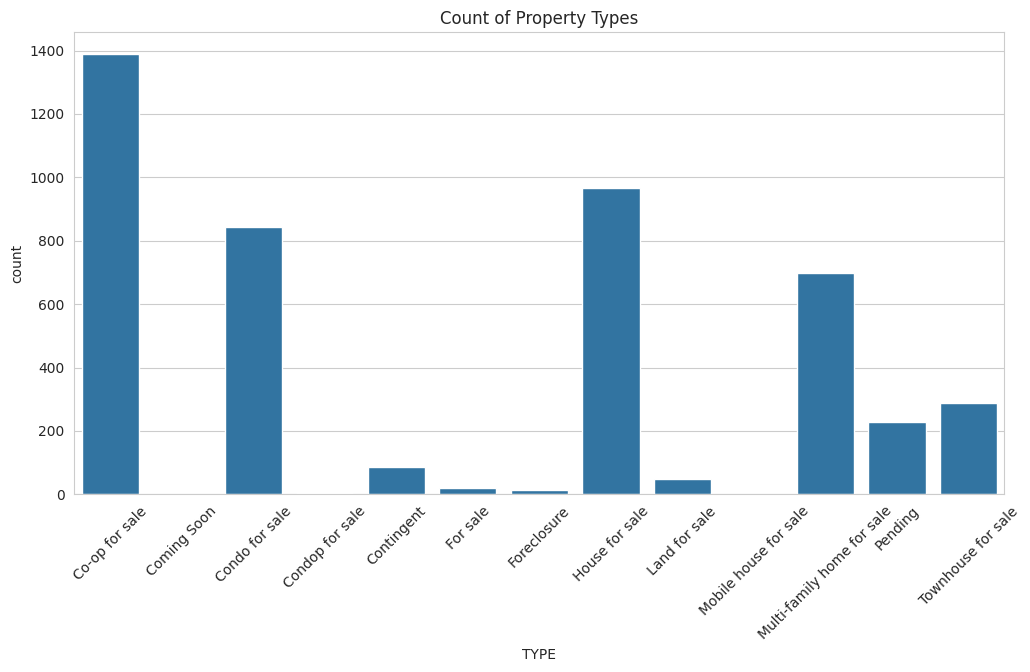

In [105]:
# Count Plot for Property Types
plt.figure(figsize=(12, 6))
sns.countplot(x='TYPE', data=df)
plt.title('Count of Property Types')
plt.xticks(rotation=45)
plt.show()

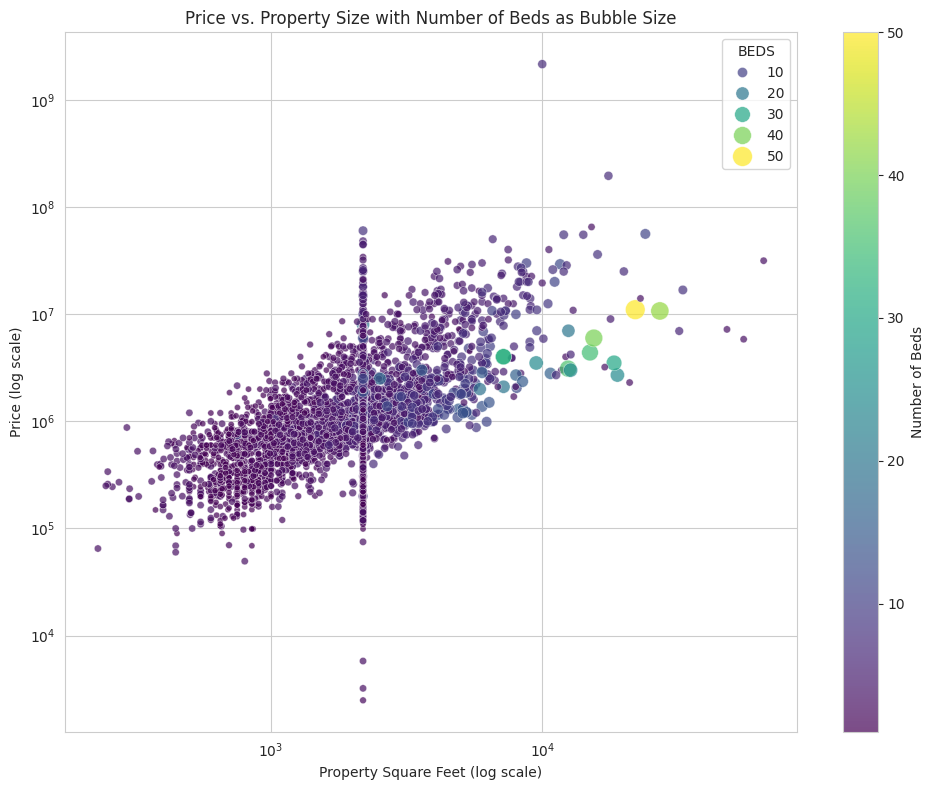

In [106]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming `df_housing` is your DataFrame with 'PropertySquareFeet', 'Price', and 'NumberOfBeds' columns
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df, x='PROPERTYSQFT', y='PRICE', size='BEDS', hue='BEDS',
                          sizes=(20, 200), alpha=0.7, palette='viridis')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Property Square Feet (log scale)')
plt.ylabel('Price (log scale)')
plt.title('Price vs. Property Size with Number of Beds as Bubble Size')

# Create a fake mappable for the color bar
norm = Normalize(vmin=min(df['BEDS']), vmax=max(df['BEDS']))
sm = ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add the colorbar using the fake mappable
cbar = plt.colorbar(sm, alpha=0.7)
cbar.set_label('Number of Beds')

plt.tight_layout()

plt.show()


Text(0, 0.5, 'Count')

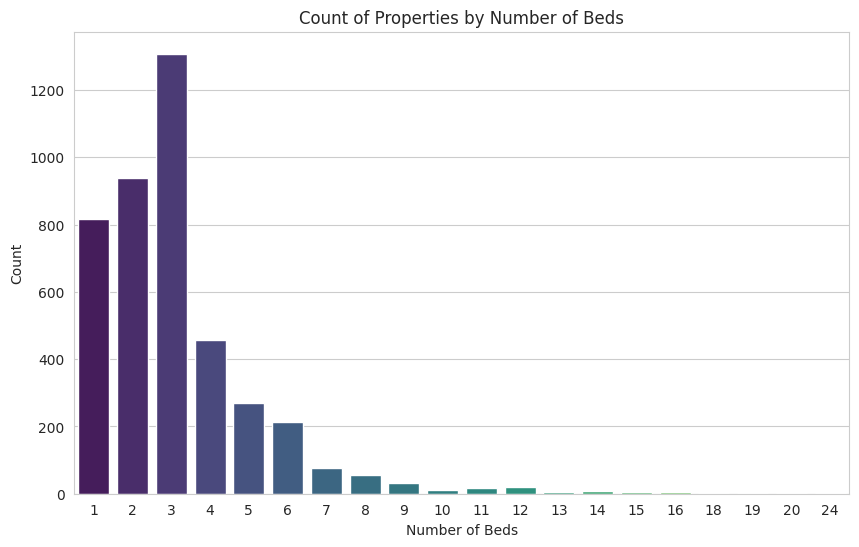

In [107]:
#Count of Properties by Number of Beds
plt.figure(figsize=(10, 6))
sns.countplot(x='BEDS', data=df_no_outliers, palette='viridis')
plt.title('Count of Properties by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Count')


In [108]:
# Create New Features - "Price per Sqft" feature
df['PRICE_PER_SQFT'] = df['PRICE'] / df['PROPERTYSQFT']

# Creating a feature indicating whether the property is in New York City
df['IS_NYC'] = df['LOCALITY'].apply(lambda x: 1 if x == 'New York' else 0)

df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_PER_SQFT,IS_NYC
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,225.000000,1
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,11114.277572,1
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,129.032258,1
3,Brokered by COMPASS,Condo for sale,69000,3,1,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,155.056180,1
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,3880.070547,1


In [109]:
df_no_outliers['PRICE_PER_SQFT'] = df_no_outliers['PRICE'] / df_no_outliers['PROPERTYSQFT']


Text(0, 0.5, 'Frequency')

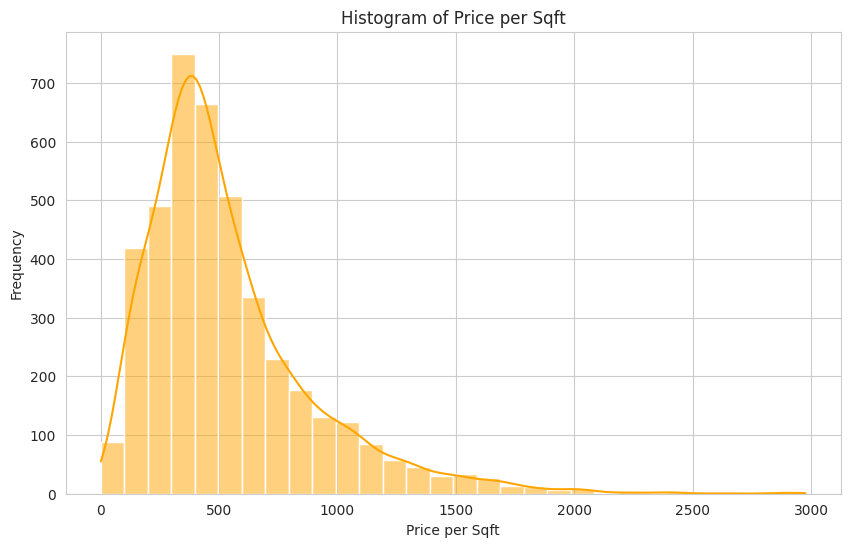

In [110]:
#Histogram of Price per Sqft
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['PRICE_PER_SQFT'], kde=True, bins=30, color='orange')
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')


In [111]:
#Average Price per Number of Bedrooms
f_3 = px.bar(df_no_outliers.groupby('BEDS')['PRICE'].mean().reset_index(),
              x='BEDS', y='PRICE',
              title='Average Price per Number of Bedrooms',
              labels={"BEDS": "Number of Bedrooms", "PRICE": "Average Price"})
f_3.update_layout(xaxis_title="Number of Bedrooms", yaxis_title="Average Price")
f_3.show()

In [112]:
#Mapbox of properties based on latitiude and longitude
f_6 = px.scatter_mapbox(df_no_outliers, lat='LATITUDE', lon='LONGITUDE', color='PRICE',
                         color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                         mapbox_style="carto-positron", title='Geographical Distribution of Prices in New York')
f_6.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
f_6.show()


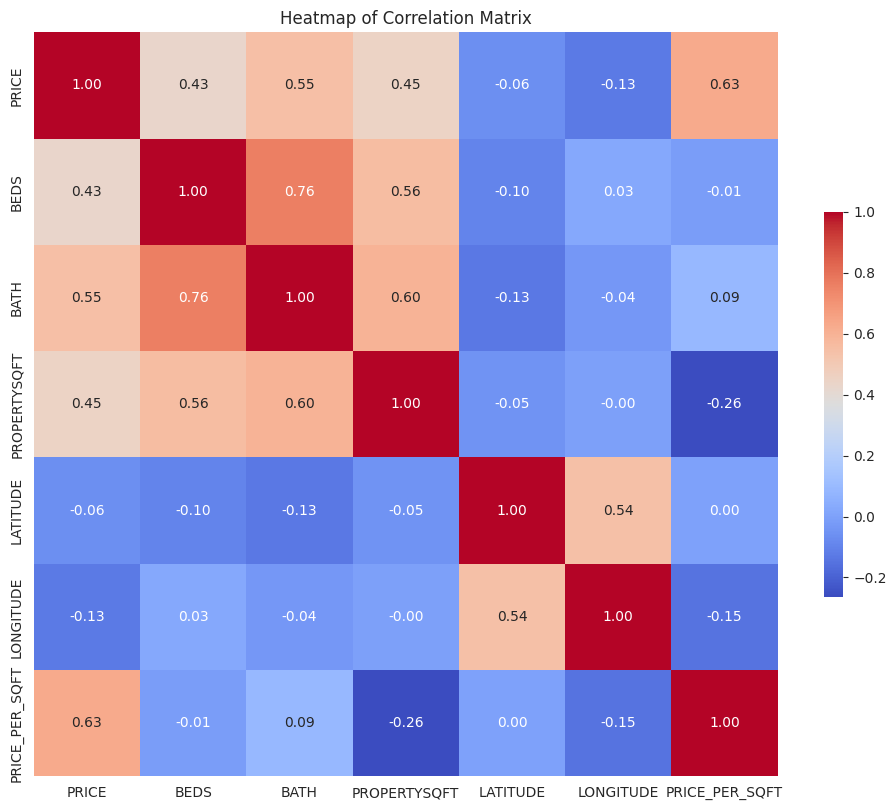

In [113]:
# Correlation Matrix between the columns
correlation_matrix = df_no_outliers.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Matrix')
plt.show()


# Scaling Data

In [114]:
numerical_features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

scaler = StandardScaler()

# Normalizing numerical features
df_scaled = df_no_outliers.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_no_outliers[numerical_features])


In [115]:
df_scaled.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_PER_SQFT
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,-0.957860,-0.540110,-0.074322,-0.440285,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",0.559659,-0.353409,225.000000
2,Brokered by Sowae Corp,House for sale,-1.048148,0.418529,-0.074322,0.163387,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",-1.859850,-2.450256,129.032258
3,Brokered by COMPASS,Condo for sale,-1.361695,-0.060791,-0.839559,-1.377693,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",0.561235,-0.354633,155.056180
5,Brokered by Sowae Corp,House for sale,-0.342258,0.897849,-0.074322,2.115749,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",-0.398352,-0.204313,172.327672
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,0.001659,-0.540110,-0.074322,0.329478,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",1.091003,-0.091272,411.819779


In [116]:
df_scaled[numerical_features].head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,-0.957860,-0.540110,-0.074322,-0.440285,0.559659,-0.353409
2,-1.048148,0.418529,-0.074322,0.163387,-1.859850,-2.450256
3,-1.361695,-0.060791,-0.839559,-1.377693,0.561235,-0.354633
5,-0.342258,0.897849,-0.074322,2.115749,-0.398352,-0.204313
6,0.001659,-0.540110,-0.074322,0.329478,1.091003,-0.091272


In [120]:
X_selected = df_scaled[numerical_features].drop(['PRICE'],axis=1)

In [124]:
selected_feature_names=X_selected.columns

# Using Random Forest to determine feature importance






In [125]:
rf = RandomForestRegressor()

rf.fit(X_selected, df_scaled['PRICE'])

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
feature_importance_df


,Feature,Importance
1,BATH,0.333746
3,LATITUDE,0.231220
4,LONGITUDE,0.201418
2,PROPERTYSQFT,0.188230
0,BEDS,0.045385


Building models and evaluating performance

In [126]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, df_scaled['PRICE'], test_size=0.2, random_state=42)


In [127]:
# Initialize the models including Lasso and Ridge
linear_reg = LinearRegression()
random_forest = RandomForestRegressor()
knn = KNeighborsRegressor()
decision_tree = DecisionTreeRegressor()
svm = SVR()
gradient_boosting = GradientBoostingRegressor()
xgboost = XGBRegressor()
lightgbm = LGBMRegressor()
lasso = Lasso()
ridge = Ridge()


In [128]:
# Train the models including Lasso and Ridge
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 3393, number of used features: 5
[LightGBM] [Info] Start training from score 0.000375


Ridge()

In [129]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize additional models including Lasso and Ridge
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Machine": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

# Define hyperparameters grid for each model including Lasso and Ridge
param_grids = {
    "Random Forest": {
        'n_estimators': np.arange(350, 451, 25),
        'max_features': ['sqrt', 'log2'],
        'max_depth': [35, 40, 45, 50],
        'min_samples_split': [2, 3, 4, 5],
        'min_samples_leaf': [2, 3, 4],
        'bootstrap': [True, False]
                       },
    "Gradient Boosting": { 'learning_rate': [0.05, 0.06, 0.07],
                            'n_estimators': [290, 300, 310],
                            'max_depth': [6, 7, 8],
                            'min_samples_split': [7, 8, 9],
                            'min_samples_leaf': [ 2, 3],
                            'max_features': ['sqrt'],
                            'subsample': [0.85, 0.9, 0.95]
                           },
    "XGBoost": {
        'n_estimators':[100],
        'learning_rate':[0.08],
        'gamma':[0],
        'subsample':[0.75],
        'colsample_bytree':[1],
        'max_depth':[7]
    },
    "Lasso": {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    "Ridge": {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
}

# Define a dictionary to store grid search results
grid_search_results = {}

# Perform hyperparameter tuning using GridSearchCV for each model
for model_name, model in models.items():
    print(f"Performing hyperparameter tuning for {model_name}...")
    param_grid = param_grids.get(model_name, {})
    grid_search = RandomizedSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    grid_search_results[model_name] = grid_search
    print(f"{model_name} hyperparameter tuning completed!\n")


Performing hyperparameter tuning for Linear Regression...
Linear Regression hyperparameter tuning completed!

Performing hyperparameter tuning for Random Forest...
Random Forest hyperparameter tuning completed!

Performing hyperparameter tuning for KNeighbors...
KNeighbors hyperparameter tuning completed!

Performing hyperparameter tuning for Decision Tree...
Decision Tree hyperparameter tuning completed!

Performing hyperparameter tuning for Support Vector Machine...
Support Vector Machine hyperparameter tuning completed!

Performing hyperparameter tuning for Gradient Boosting...
Gradient Boosting hyperparameter tuning completed!

Performing hyperparameter tuning for XGBoost...
XGBoost hyperparameter tuning completed!

Performing hyperparameter tuning for LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number o

Evaluating performance for Linear Regression...
Linear Regression - RMSE: 0.86268961115901, MSE: 0.7442333652016838, R^2: 0.2749433854292479
Evaluating performance for Random Forest...
Random Forest - RMSE: 0.5395451699038779, MSE: 0.29110899036660454, R^2: 0.7163920500001759
Evaluating performance for KNeighbors...
KNeighbors - RMSE: 0.6166133482949953, MSE: 0.3802120212955652, R^2: 0.629584947585683
Evaluating performance for Decision Tree...
Decision Tree - RMSE: 0.7286169966029551, MSE: 0.5308827277387106, R^2: 0.48279659135679265
Evaluating performance for Support Vector Machine...
Support Vector Machine - RMSE: 0.605778384510359, MSE: 0.3669674511399804, R^2: 0.6424882433091296
Evaluating performance for Gradient Boosting...
Gradient Boosting - RMSE: 0.5299381862077692, MSE: 0.2808344812011803, R^2: 0.7264018146522079
Evaluating performance for XGBoost...
XGBoost - RMSE: 0.5249636046589308, MSE: 0.2755867862164981, R^2: 0.7315142916490737
Evaluating performance for LightGBM...
Li

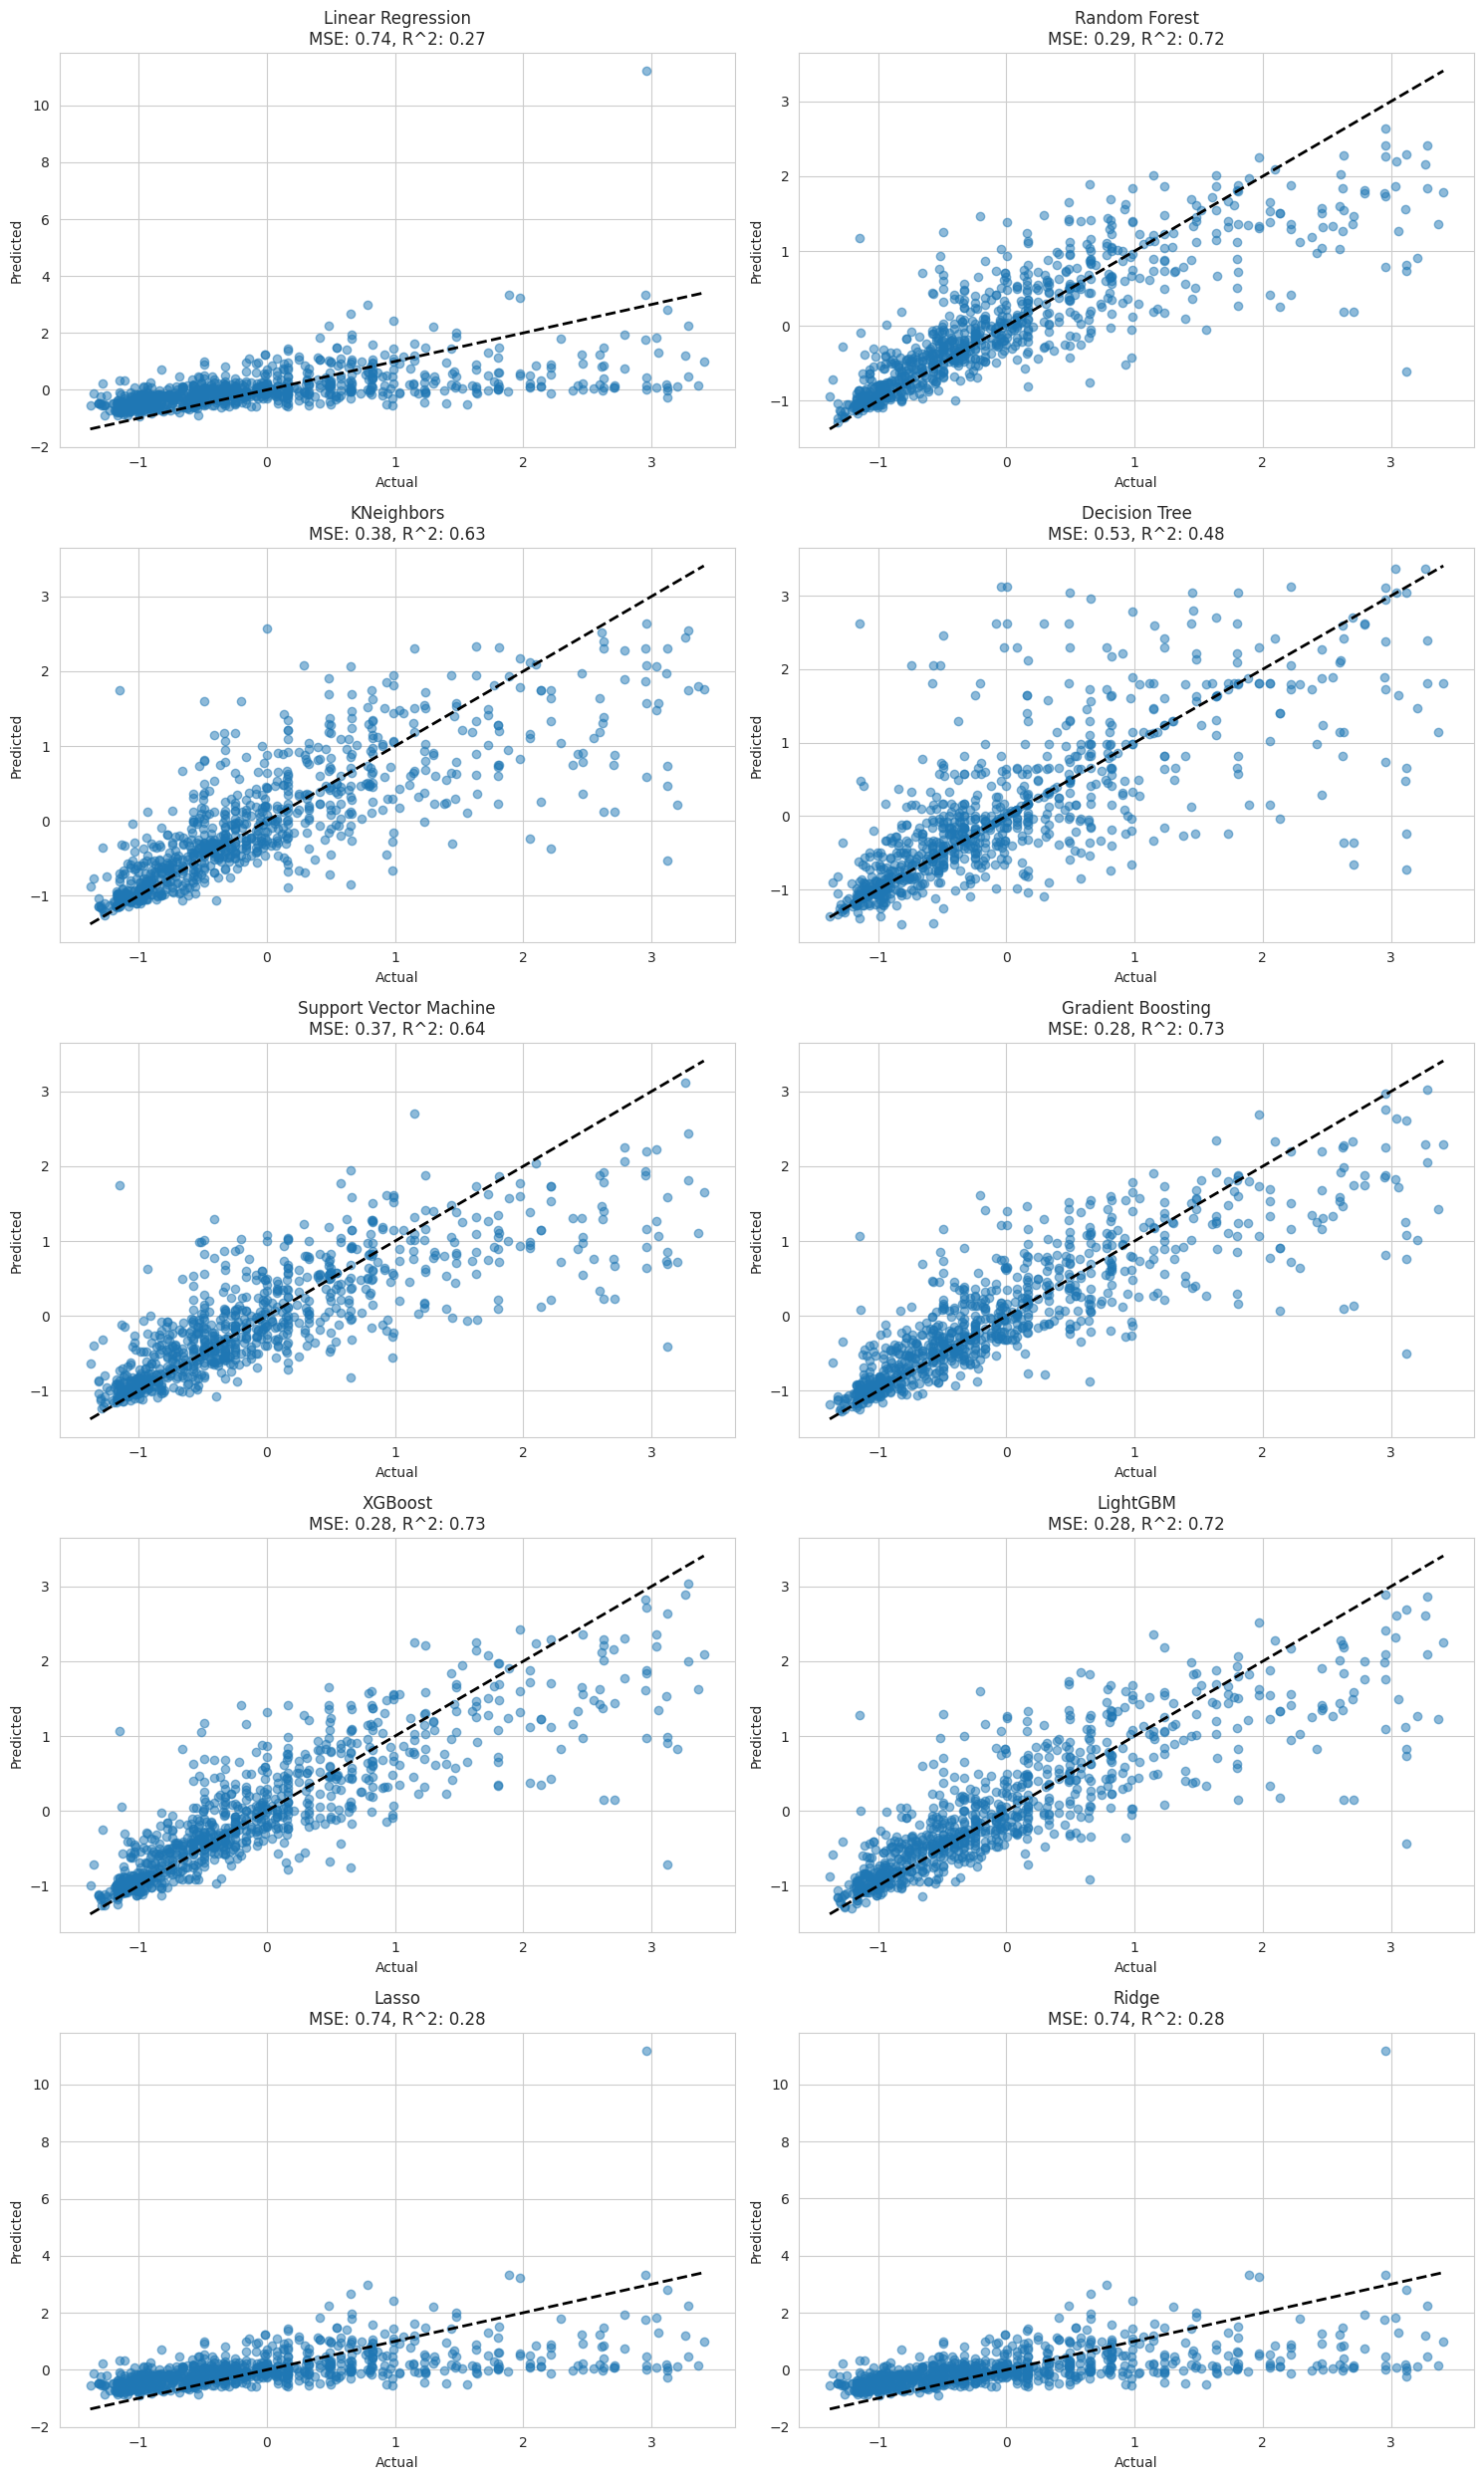

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming grid_search_results is defined and contains the best models from grid searches
# Also assuming that X_test and y_test are defined and contain your test data

# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred, squared=True)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)

    return rmse, mse, r2

# Create DataFrame to hold metrics
model_metrics_df = pd.DataFrame(columns=['MODEL', 'RMSE', 'MSE', 'R2'])

# List to hold evaluation results
evaluation_results = {}

# Calculate the number of rows needed for the grid
num_models = len(grid_search_results)
num_cols = 2  # Number of columns you want in your grid
num_rows = -(-num_models // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through models and evaluate
for i, (model_name, grid_search) in enumerate(grid_search_results.items()):
    print(f"Evaluating performance for {model_name}...")
    best_model = grid_search.best_estimator_
    rmse, mse, r2 = evaluate_model(best_model, X_test, y_test)
    evaluation_results[model_name] = {"RMSE": rmse, "MSE": mse, "R^2": r2}
    print(f"{model_name} - RMSE: {rmse}, MSE: {mse}, R^2: {r2}")

    # Plotting
    axes[i].scatter(y_test, best_model.predict(X_test), alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].set_title(f'{model_name}\nMSE: {mse:.2f}, R^2: {r2:.2f}')

    # Add the results to the DataFrame
    model_metrics_df = model_metrics_df.append({
        'MODEL': model_name,
        'RMSE': rmse,
        'MSE': mse,
        'R2': r2
    }, ignore_index=True)

# Adjust layout so plots are not overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [131]:
from sklearn.model_selection import cross_val_score

# Assuming 'gbr' is your GradientBoostingRegressor instance and 'param_grid_refined' is set

param_grid_refined = {
    'learning_rate': [0.05, 0.06, 0.07],
    'n_estimators': [290, 300, 310],
    'max_depth': [6, 7, 8],
    'min_samples_split': [7, 8, 9],
    'min_samples_leaf': [ 2, 3],
    'max_features': ['sqrt'],
    'subsample': [0.85, 0.9, 0.95]
}


grid_search = RandomizedSearchCV(estimator=gradient_boosting, param_distributions = param_grid_refined, cv=5, verbose=2, n_jobs=-1)

# Fit using the polynomial features if applied
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Cross-validated R^2 score
cv_scores = cross_val_score(grid_search.best_estimator_, X_selected, df_scaled['PRICE'], cv=5)
print("Cross-validated R^2 scores: ", cv_scores)
print("Mean CV R^2 score: ", np.mean(cv_scores))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'subsample': 0.95, 'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.06}
Cross-validated R^2 scores:  [0.61259176 0.73401289 0.72918709 0.7446432  0.73366012]
Mean CV R^2 score:  0.7108190127532314


In [132]:
# Select the model with the best performance based on RMSE and R^2
best_model_name = min(evaluation_results, key=lambda x: (evaluation_results[x]['RMSE'], -evaluation_results[x]['R^2']))
best_model_performance = evaluation_results[best_model_name]


In [133]:
best_model_name

'XGBoost'

In [134]:
best_model_performance



{'RMSE': 0.5249636046589308,
 'MSE': 0.2755867862164981,
 'R^2': 0.7315142916490737}

In [135]:
model_metrics_df

,MODEL,RMSE,MSE,R2
0,Linear Regression,0.862690,0.744233,0.274943
1,Random Forest,0.539545,0.291109,0.716392
2,KNeighbors,0.616613,0.380212,0.629585
3,Decision Tree,0.728617,0.530883,0.482797
4,Support Vector Machine,0.605778,0.366967,0.642488
5,Gradient Boosting,0.529938,0.280834,0.726402
6,XGBoost,0.524964,0.275587,0.731514
7,LightGBM,0.531501,0.282493,0.724786
8,Lasso,0.862339,0.743629,0.275532
9,Ridge,0.862342,0.743634,0.275527


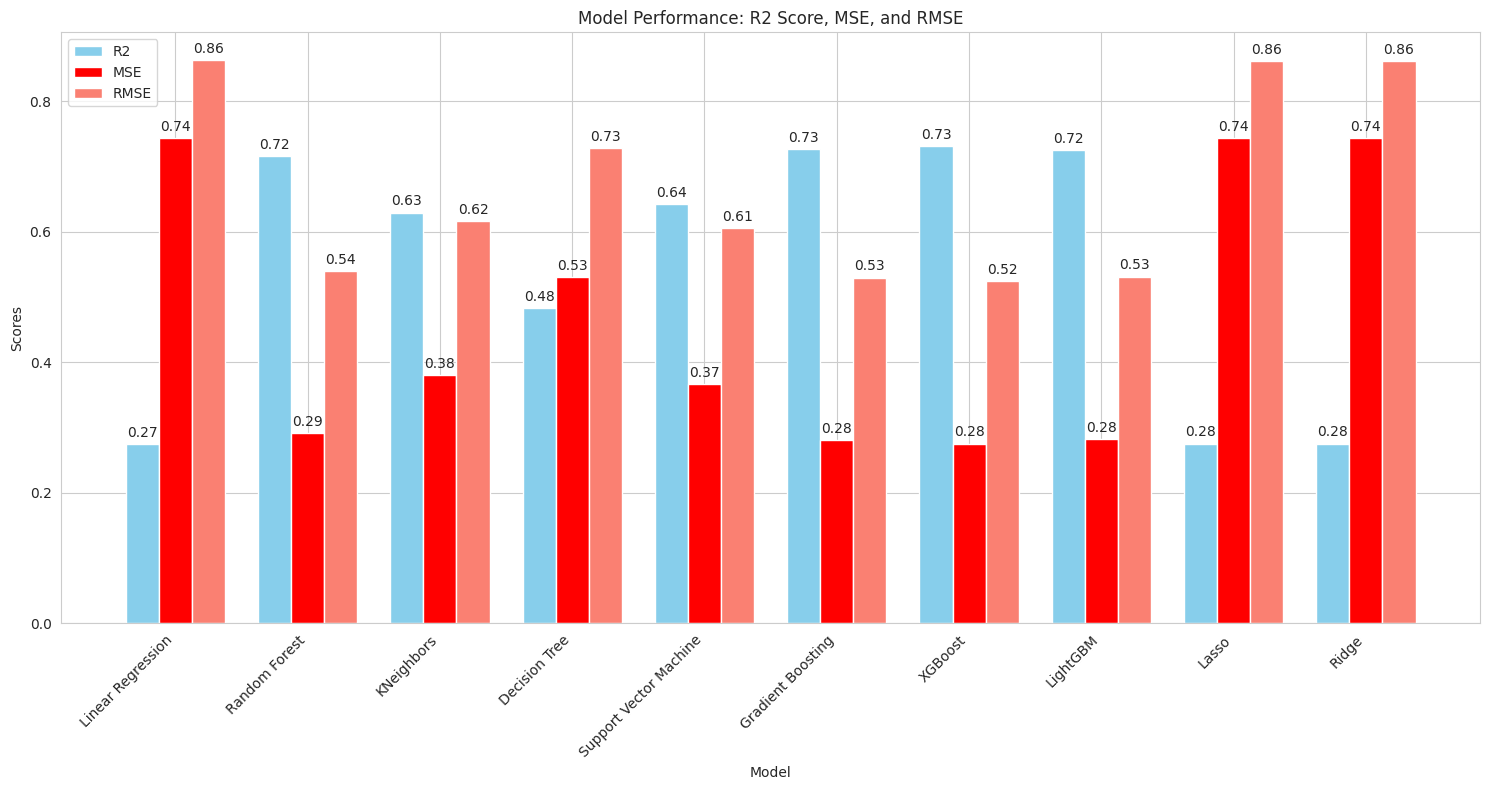

In [136]:

# Assuming 'model_metrics_df' is your DataFrame
models = model_metrics_df['MODEL']
r2_scores = model_metrics_df['R2']
mse_scores = model_metrics_df['MSE']
rmse_scores = model_metrics_df['RMSE']  # Assuming RMSE column exists

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars to fit three bars

fig, ax = plt.subplots(figsize=(15, 8))

# Create bars for R2, MSE, and RMSE
r2_rects = ax.bar(x - width, r2_scores, width, label='R2', color='skyblue')
mse_rects = ax.bar(x, mse_scores, width, label='MSE', color='red')
rmse_rects = ax.bar(x + width, rmse_scores, width, label='RMSE', color='salmon')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Performance: R2 Score, MSE, and RMSE')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Attach a text label above each bar, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(r2_rects)
autolabel(mse_rects)
autolabel(rmse_rects)

fig.tight_layout()
plt.show()
